### Assignment: CTA200H Problem Set (Problem 3)
#### Authors: Ayush Pandhi & Mathew Bub
#### Due Date: May 13, 2019

### General Setup:

In [1]:
#Importing the required modules
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve as conv

### Section a)

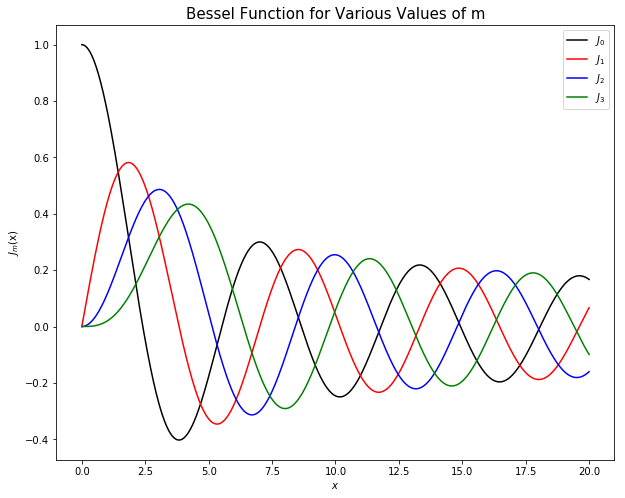

In [2]:
#Define the Bessel function
def besselfunc(m, x):
    return (1 / np.pi * float(integrate.quad(lambda theta: np.cos(m * theta - x * np.sin(theta)), 0, np.pi)[0]))

#Setting up x and y for the plot
x = np.linspace(0, 20, 1000)
y = np.vectorize(besselfunc)

#Plotting for a few values of m
plt.figure(figsize=(10,8))
plt.plot(x, y(0, x), 'k', label = '$J_{0}$')
plt.plot(x, y(1, x), 'r', label = '$J_{1}$')
plt.plot(x, y(2, x), 'b', label = '$J_{2}$')
plt.plot(x, y(3, x), 'g', label = '$J_{3}$')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$J_{m}$(x)', fontsize=10)
plt.title('Bessel Function for Various Values of m', fontsize=15)
plt.legend()
plt.show()

### Section b)

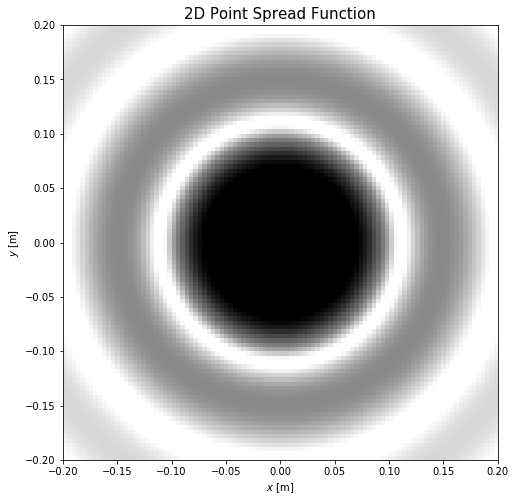

In [3]:
#Defining the point spread function and choosing some set of parameters
def pointspreadfunc(q):
    izero = 875
    a = 0.19
    wl = 0.05
    R = 0.7
    x = (2*np.pi*a*q)/(wl*R)
    return (izero)*(2*besselfunc(1, x)/x)**2

#Plotting the 2D airy disk
#Setting up x and [X, Y] meshgrid
x = np.linspace(-0.2, 0.2, 100)
[X, Y] = np.meshgrid(x, x)

#Defining the vectorize of the point spread function and applying it to the radius
pointspreadfuncvec = np.vectorize(pointspreadfunc)
radius = np.sqrt(X**2 + Y**2)
output = pointspreadfuncvec(radius)

#Plotting the point spread function in 2D
#extent() gives correct values for x and y in meters, otherwise get 0 - 100 range on both axis
plt.figure(figsize=(10,8))
plt.imshow(np.log(output), extent=(-0.2, 0.2, -0.2, 0.2), cmap='Greys', vmin=0, vmax=5)
plt.xlabel('$x$ [m]', fontsize=10)
plt.ylabel('$y$ [m]', fontsize=10)
plt.title('2D Point Spread Function', fontsize=15)
plt.show()

### Section c)

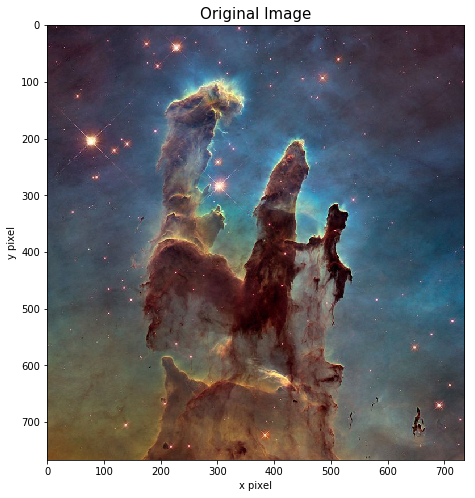

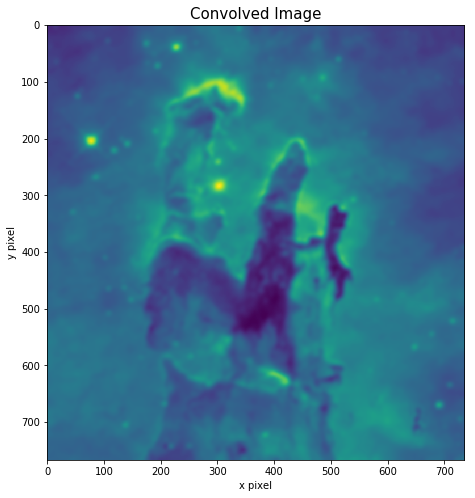

In [4]:
#Turning the picture into a usable array
pillars = mpimg.imread("pillarsofcreation.jpg")
pillarsnp = pillars.mean(axis=-1)

#Setting up x, y and the [X, Y] meshgrid
x = np.linspace(-0.5, 0.5, 101)
y = np.linspace(-0.5, 0.5, 100)
[X, Y] = np.meshgrid(x, y)

#Defining the vectorize of the point spread function and applying it to the radius
pointspreadfuncvec = np.vectorize(pointspreadfunc)
radius2 = np.sqrt(X**2 + Y**2)
output = pointspreadfuncvec(radius2)

#Convolving our image by our point spread function
conv1 = conv(pillarsnp, output)

#Plotting the original image
plt.figure(figsize=(10,8))
plt.imshow(pillars)
plt.xlabel('x pixel', fontsize=10)
plt.ylabel('y pixel', fontsize=10)
plt.title('Original Image', fontsize=15)
plt.show()

#Plotting the convolved image
plt.figure(figsize=(10,8))
plt.imshow(conv1)
plt.xlabel('x pixel', fontsize=10)
plt.ylabel('y pixel', fontsize=10)
plt.title('Convolved Image', fontsize=15)
plt.show()